In [1]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

import funciones_auxiliares as aux

# warnings.filterwarnings('ignore')
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv('income-db.csv')
df = df.replace('?', np.nan)

# Analisis del vector objetivo (```income```)

1. Ver su cantidad de datos
2. Ver su distribucion graficamente
3. Ver su cantidad de datos faltantes

In [3]:
vector_objetivo = df['income']

,Frecuencia,Porcentaje
<=50K,37155,0.760718
>50K,11687,0.239282


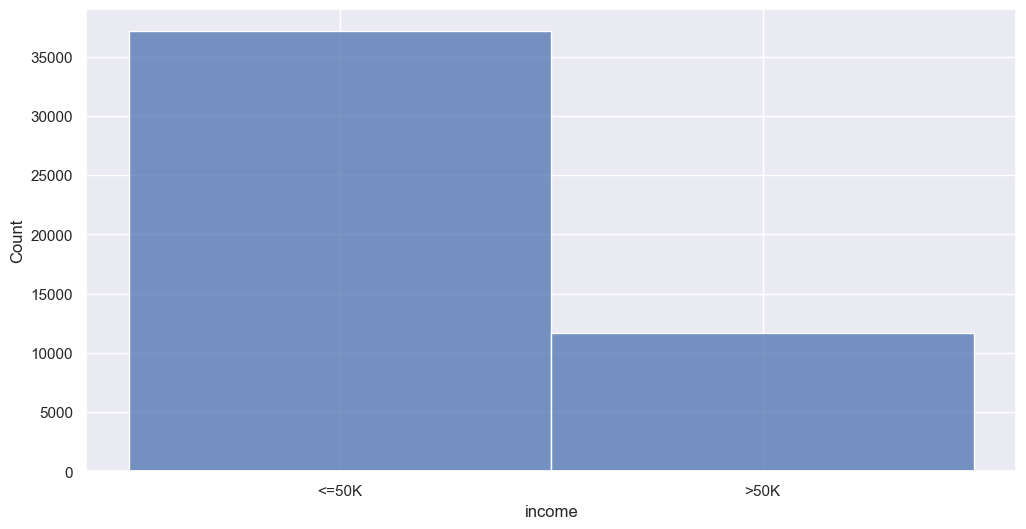

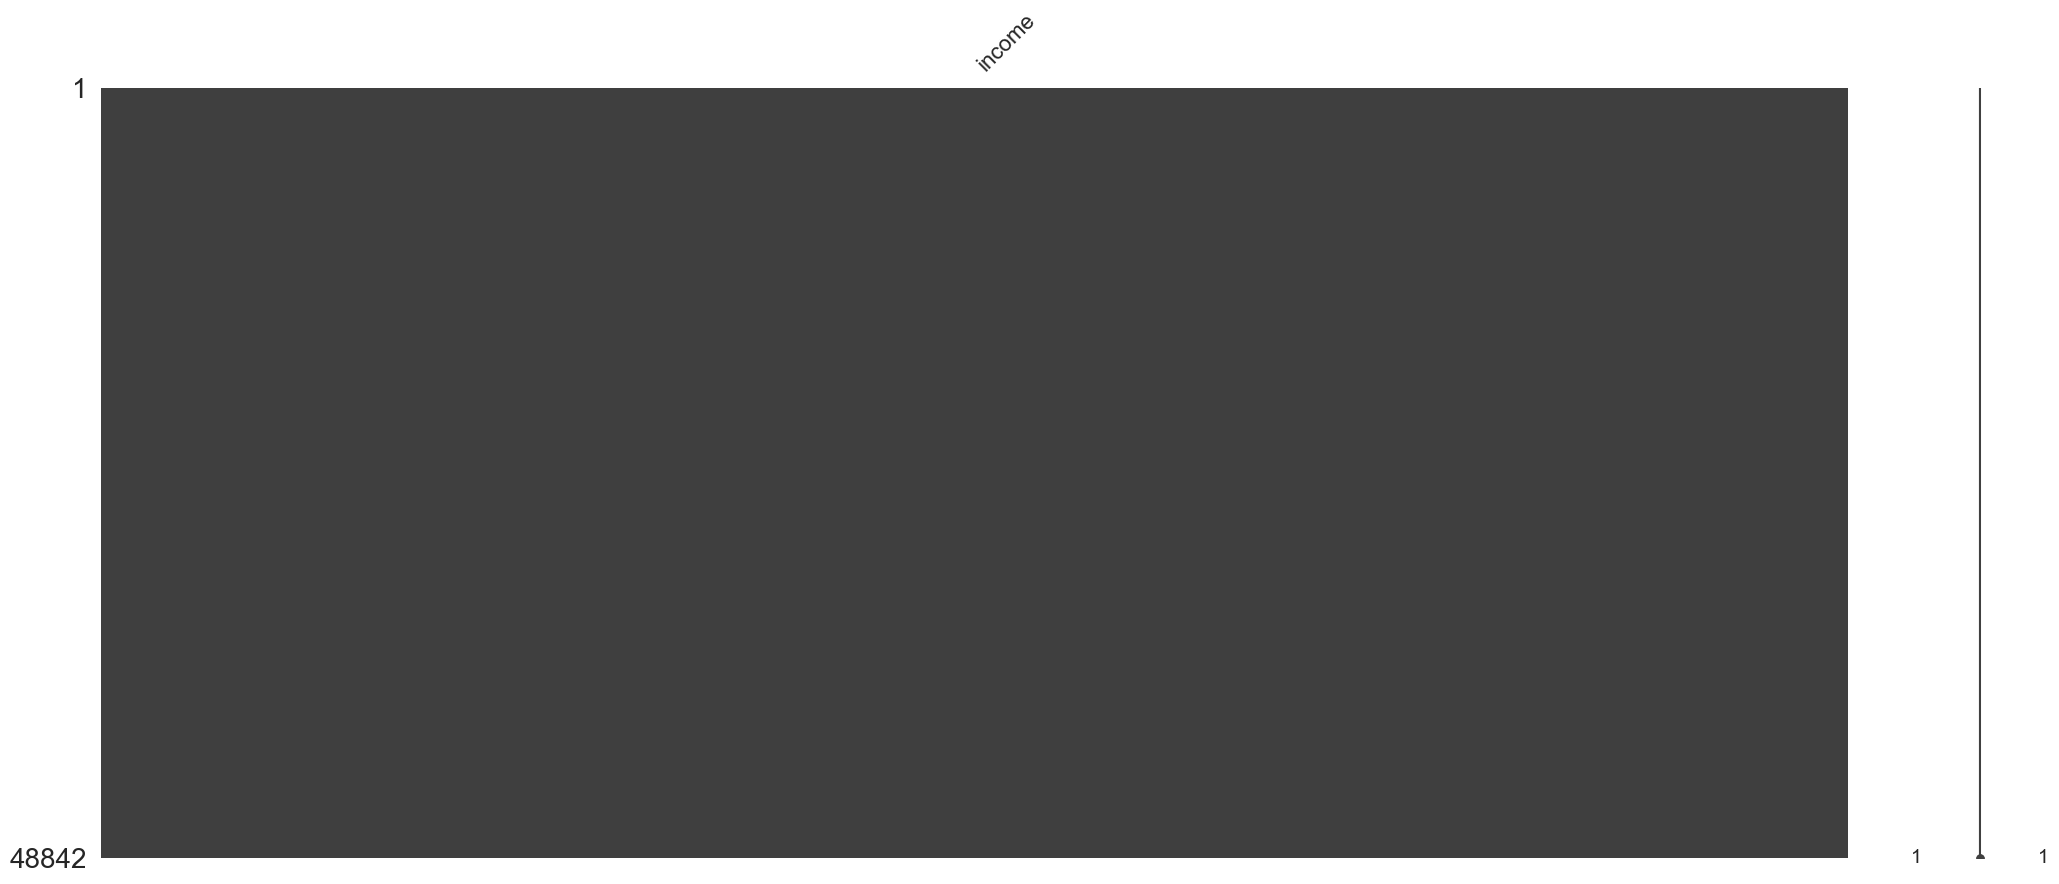

In [4]:
aux.analizar_vector_objetivo_discreto(vector_objetivo)

De los resultados se puede ver que existen 37155 (76% de los datos) personas que ganan igual o
menos de 50K dolares anuales. Por otro lado, existen 11687 (24% de los datos) personas que ganan
sobre los 50K dolares anuales.

Ademas, la variable carece de algun valor faltante. 

# Analisis de variables independientes (todas menos ```income```)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


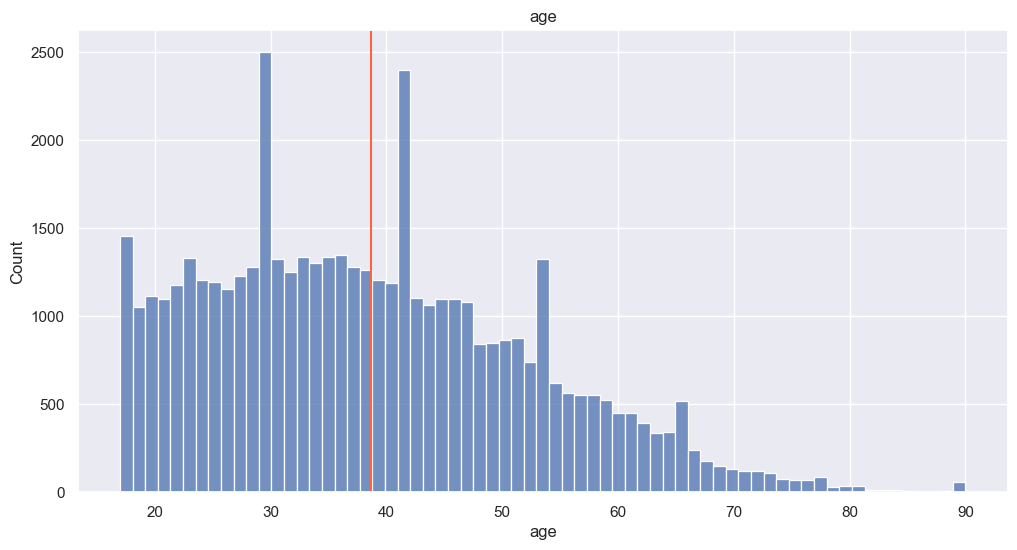

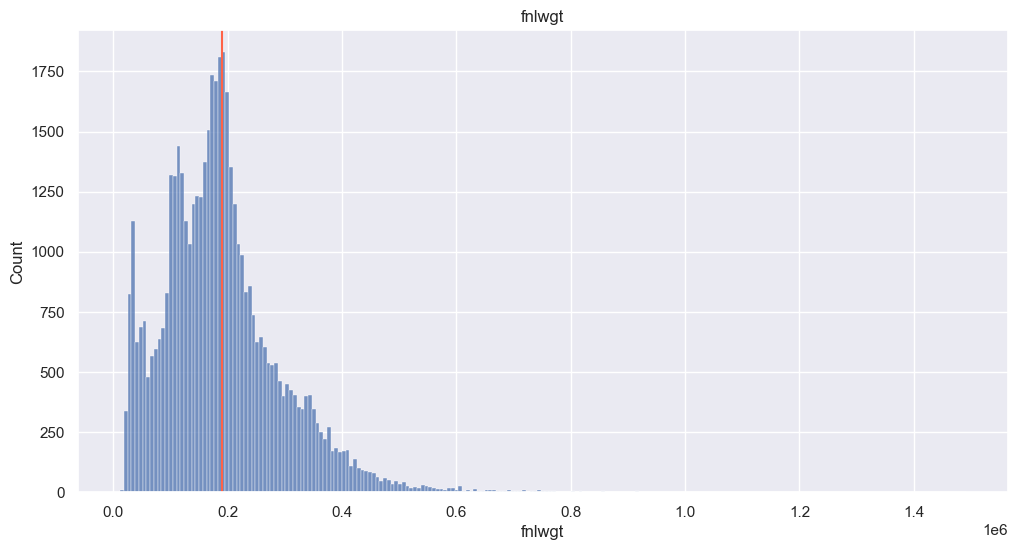

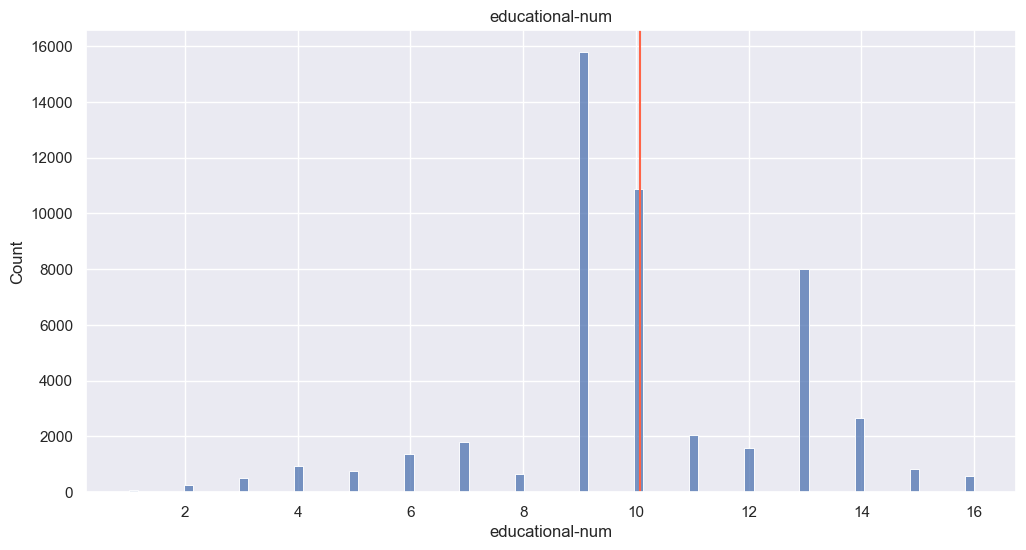

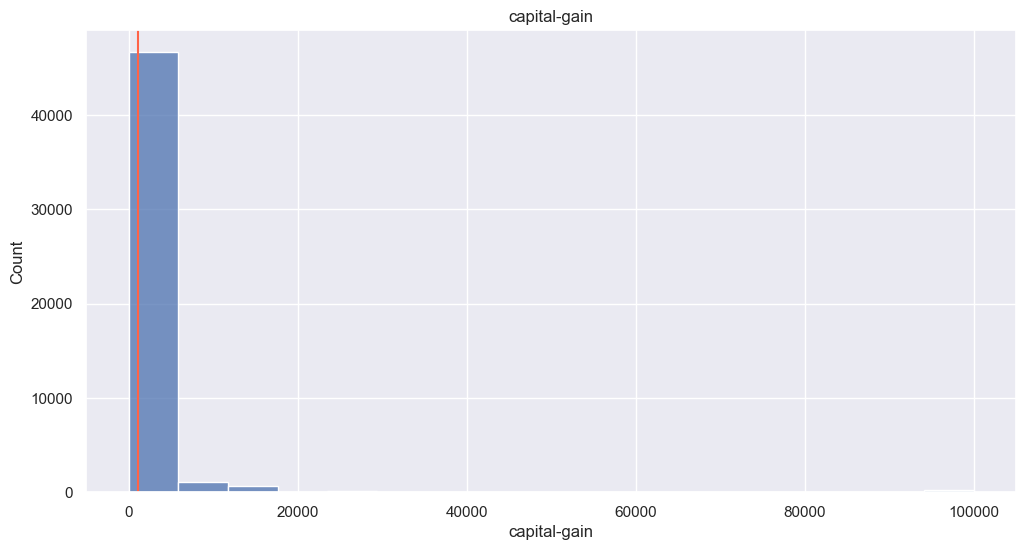

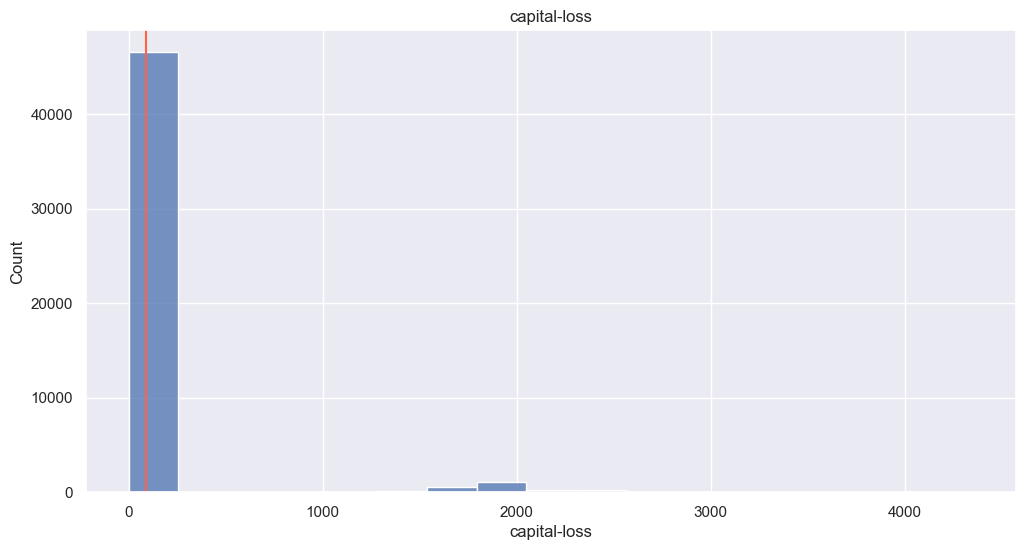

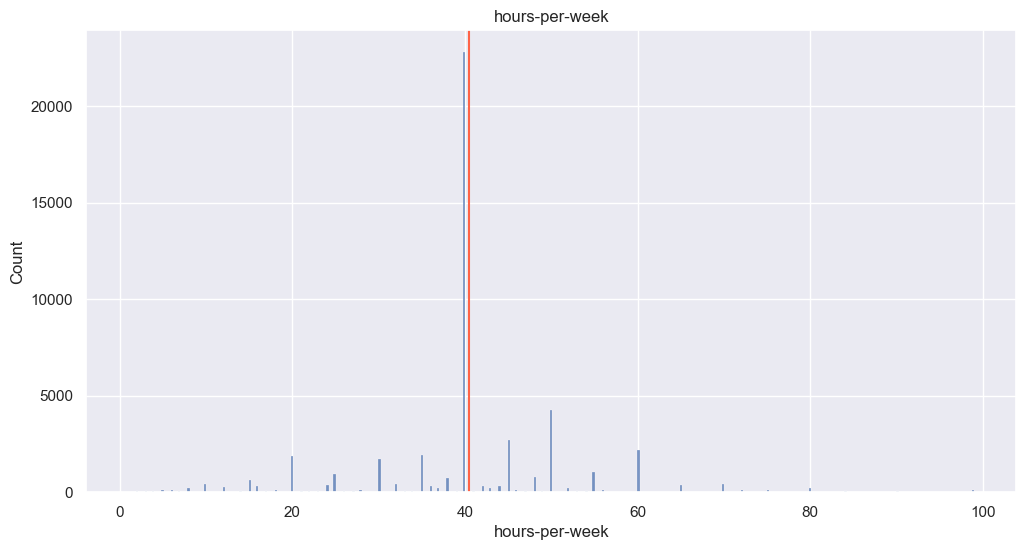

In [7]:
variables_independientes = df.drop(columns='income')
numericas, categoricas = aux.separar_df_a_numericas_categoricas(variables_independientes)
aux.analizar_variables_numericas(numericas)
